In [1]:
import os
from coolbox.api import *
import matplotlib.pyplot as plt

In [2]:
# Modify this depending on which chromosome you want to plot, and which part of the chromosome
subrange = "chr20:0-46200000"

In [3]:
def create_poreC_plot(poreC_cool_path):
    # Define the paths for the histone and CTCF data
    histone_dir = "/commons/groups/gursoy_lab/wlounsberyscaife/PoreC_Tensors/data/plot_annotation/histone_ChIP-seq"
    histone_bigWig_path = os.path.join(histone_dir, "ENCFF087YCU.bigWig")

    ctcf_dir = "/commons/groups/gursoy_lab/wlounsberyscaife/PoreC_Tensors/data/plot_annotation/CTCF_ChIP-seq"
    ctcf_bigWig_path = os.path.join(ctcf_dir, "ENCFF838AMT.bigWig")

    # Create the tracks for histone modification and CTCF enrichment
    histone_track = BigWig(histone_bigWig_path)
    ctcf_track = BigWig(ctcf_bigWig_path)

    # Create the Pore-C track
    poreC_track = Cool(poreC_cool_path, is_raw=True, balance=False, style="matrix", cmap="YlOrRd", color_bar='horizontal')

    # Create the frame for the plot
    frame = ( 
        XAxis() + 
        poreC_track + Title("Pore-C Matrix, chr20") + TrackHeight(12) +
        Spacer(0.5) + 
        histone_track + Title("Histone Modification (H3K27ac)") + Color("#ce00ce") + TrackHeight(4) +
        Spacer(0.5) + 
        ctcf_track + Title("CTCF Enrichment") + Color("#fd9c6b") + TrackHeight(4)
    )
    return frame

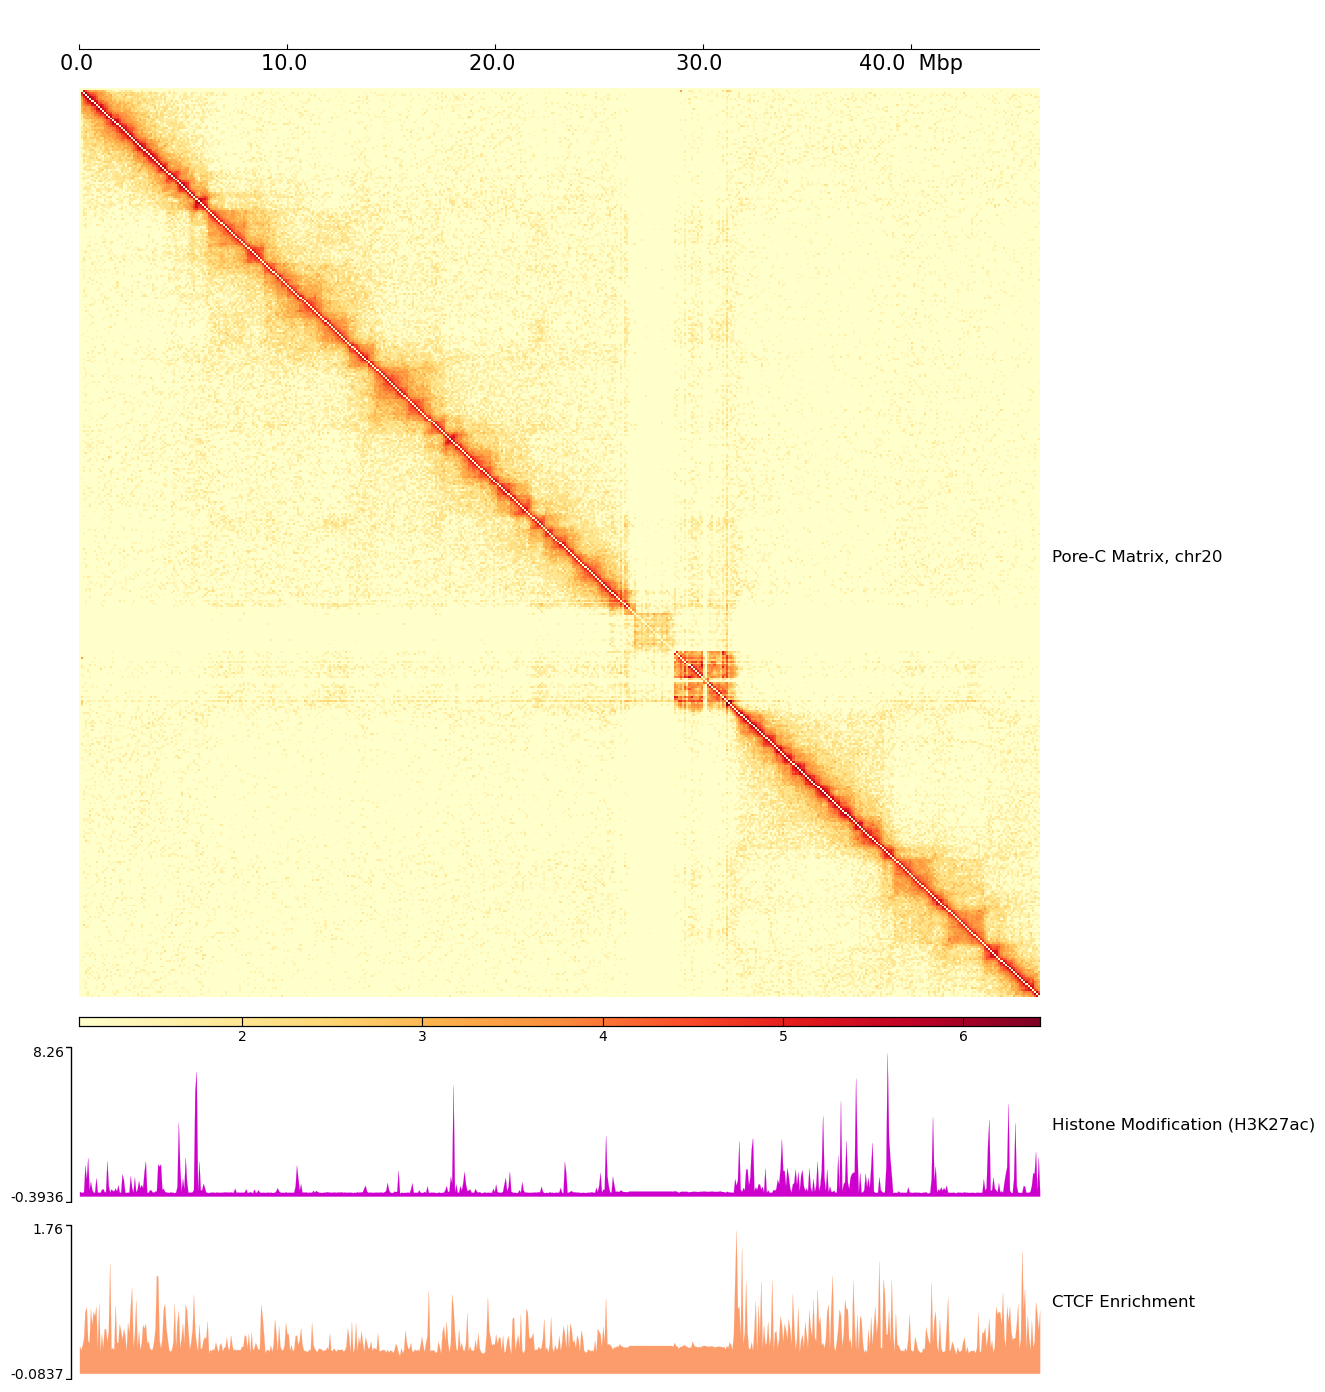

In [4]:
cool_directory = '/commons/groups/gursoy_lab/wlounsberyscaife/PoreC_Tensors/output/cools'
poreC_cool_path = os.path.join(cool_directory, "NlaIII_GM12878_chr20_tensor.cool")

myframe = create_poreC_plot(poreC_cool_path)
myframe.properties['width'] = 30

myframe.plot(subrange)

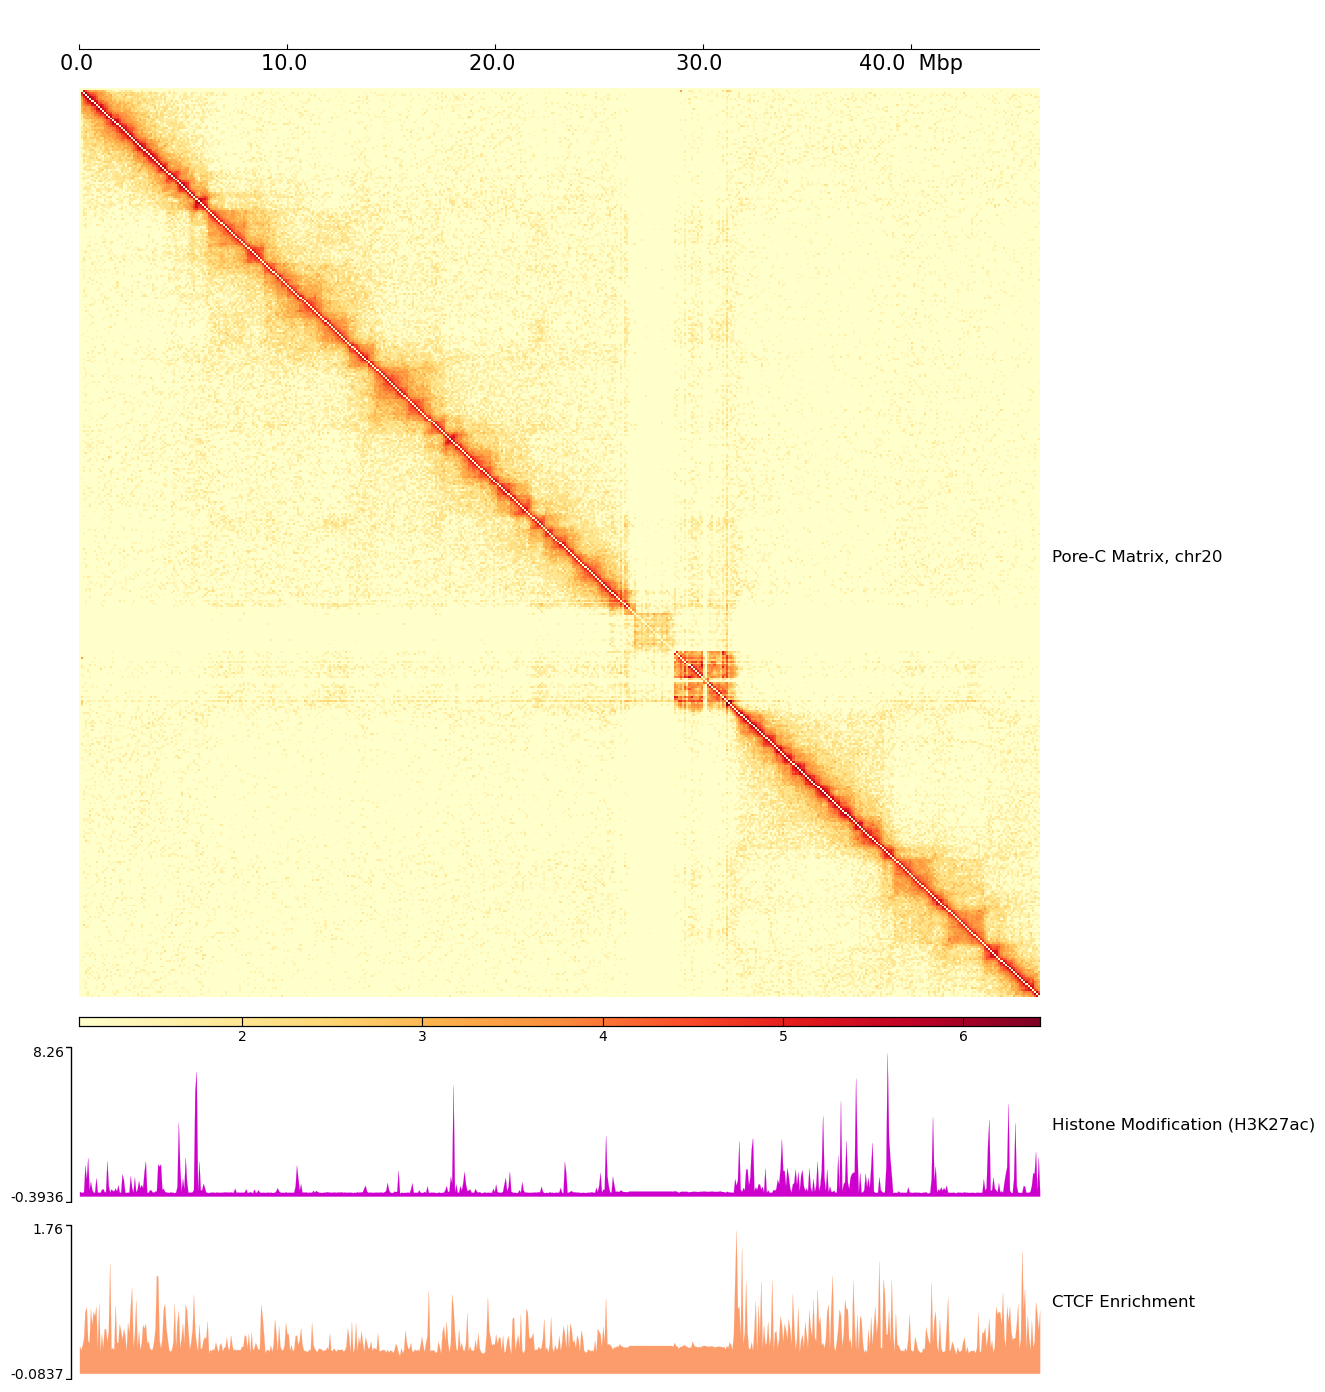

In [5]:
poreC_cool_path_balanced = os.path.join(cool_directory, "NlaIII_GM12878_chr20_tensor.cool")

myframe_balanced = create_poreC_plot(poreC_cool_path_balanced)
myframe_balanced.properties['width'] = 30

myframe_balanced.plot(subrange)